In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
our_data = pd.read_csv('C:/Users/billo/Documents/Python Scripts/b.csv')
our_data.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [3]:
X = our_data.iloc[:,:-1].values
y = our_data.iloc[:,-1].values

In [4]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 6:7])
X[:, 6:7] = imputer.transform(X[:, 6:7])

In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [6]:
print(y)

[0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1
 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0
 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1
 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1
 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0
 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1
 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0
 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 1 0 0 0 1 1 1 0 1 0 

In [7]:
from sklearn.model_selection import train_test_split
X_trainer, X_tester, y_trainer, y_tester = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_trainer, X_val, y_trainer, y_val = train_test_split(X_trainer, y_trainer, test_size=0.3, random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler
stand = StandardScaler()
X_trainer = stand.fit_transform(X_trainer)
X_tester = stand.transform(X_tester)

In [9]:
print(X_trainer)

[[ 0.26939507 -1.21272384 -0.67394759 ... -0.58682749 -0.6037437
  -0.31694666]
 [ 0.28296758  0.2311458   1.71278395 ...  1.48646797 -0.6037437
  -0.31694666]
 [ 0.65928084  2.03598284  0.68989901 ...  1.48646797  2.04344021
   0.36052683]
 ...
 [-0.06759064 -0.85175643 -0.67394759 ... -0.17216839 -0.6037437
  -0.31694666]
 [ 0.57189211 -0.12982161 -0.67394759 ... -0.17216839 -0.6037437
  -0.31694666]
 [ 0.64798318  0.59211321 -0.67394759 ... -0.17216839 -0.6037437
  -0.31694666]]


In [10]:
print(X_tester)

[[ 0.89901197 -0.12982161 -0.67394759 ... -1.00148658 -0.6037437
  -0.31694666]
 [-0.59421878 -0.12982161 -0.33298594 ... -0.58682749 -0.6037437
  -0.31694666]
 [ 0.20497092  0.59211321  1.03086066 ...  1.48646797  1.71254222
  -0.31694666]
 ...
 [-1.19930344 -1.21272384 -0.67394759 ... -1.00148658 -0.6037437
  -0.31694666]
 [-1.90103999  2.03598284  0.34893736 ...  0.65714979  0.05805228
  -0.31694666]
 [-0.06920011 -1.21272384 -0.67394759 ... -0.17216839 -0.6037437
  -0.31694666]]


In [11]:
arti_neu_net = tf.keras.models.Sequential()

In [12]:
arti_neu_net.add(tf.keras.layers.Dense(units =10,input_dim = 10, activation = 'relu'))

In [13]:
arti_neu_net.add(tf.keras.layers.Dense(units = 10, activation = 'relu'))

In [14]:
arti_neu_net.add(tf.keras.layers.Dense(units = 10, activation = 'relu'))

In [15]:
arti_neu_net.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [16]:
arti_neu_net.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [17]:
history = arti_neu_net.fit(X_trainer,y_trainer, batch_size = 32, epochs = 350, validation_data=(X_val, y_val), validation_split = 0.2)

Epoch 1/350
9/9 [==============================] - 4s 331ms/step - loss: 0.6288 - accuracy: 0.7674 - val_loss: 0.5913 - val_accuracy: 0.7971
Epoch 2/350
9/9 [==============================] - 0s 12ms/step - loss: 0.5930 - accuracy: 0.7912 - val_loss: 0.5463 - val_accuracy: 0.8841
Epoch 3/350
9/9 [==============================] - 0s 11ms/step - loss: 0.5339 - accuracy: 0.8524 - val_loss: 0.4984 - val_accuracy: 0.9130
Epoch 4/350
9/9 [==============================] - 0s 12ms/step - loss: 0.5092 - accuracy: 0.8461 - val_loss: 0.4451 - val_accuracy: 0.9420
Epoch 5/350
9/9 [==============================] - 0s 11ms/step - loss: 0.4578 - accuracy: 0.8996 - val_loss: 0.3904 - val_accuracy: 0.9565
Epoch 6/350
9/9 [==============================] - 0s 11ms/step - loss: 0.3967 - accuracy: 0.9251 - val_loss: 0.3370 - val_accuracy: 0.9710
Epoch 7/350
9/9 [==============================] - 0s 13ms/step - loss: 0.3439 - accuracy: 0.9361 - val_loss: 0.2889 - val_accuracy: 0.9855
Epoch 8/350
9/9 [==

9/9 [==============================] - 0s 10ms/step - loss: 0.0459 - accuracy: 0.9839 - val_loss: 0.0438 - val_accuracy: 0.9855
Epoch 60/350
9/9 [==============================] - 0s 8ms/step - loss: 0.0532 - accuracy: 0.9827 - val_loss: 0.0444 - val_accuracy: 0.9855
Epoch 61/350
9/9 [==============================] - 0s 13ms/step - loss: 0.0419 - accuracy: 0.9873 - val_loss: 0.0445 - val_accuracy: 0.9855
Epoch 62/350
9/9 [==============================] - 0s 13ms/step - loss: 0.0498 - accuracy: 0.9821 - val_loss: 0.0453 - val_accuracy: 0.9855
Epoch 63/350
9/9 [==============================] - 0s 11ms/step - loss: 0.0417 - accuracy: 0.9878 - val_loss: 0.0453 - val_accuracy: 0.9855
Epoch 64/350
9/9 [==============================] - 0s 8ms/step - loss: 0.0606 - accuracy: 0.9767 - val_loss: 0.0462 - val_accuracy: 0.9855
Epoch 65/350
9/9 [==============================] - 0s 9ms/step - loss: 0.0354 - accuracy: 0.9895 - val_loss: 0.0465 - val_accuracy: 0.9855
Epoch 66/350
9/9 [===========

9/9 [==============================] - 0s 12ms/step - loss: 0.0192 - accuracy: 0.9963 - val_loss: 0.0615 - val_accuracy: 0.9710
Epoch 118/350
9/9 [==============================] - 0s 10ms/step - loss: 0.0130 - accuracy: 0.9979 - val_loss: 0.0626 - val_accuracy: 0.9710
Epoch 119/350
9/9 [==============================] - 0s 9ms/step - loss: 0.0085 - accuracy: 0.9993 - val_loss: 0.0623 - val_accuracy: 0.9710
Epoch 120/350
9/9 [==============================] - 0s 12ms/step - loss: 0.0110 - accuracy: 0.9939 - val_loss: 0.0636 - val_accuracy: 0.9710
Epoch 121/350
9/9 [==============================] - 0s 13ms/step - loss: 0.0115 - accuracy: 0.9965 - val_loss: 0.0629 - val_accuracy: 0.9710
Epoch 122/350
9/9 [==============================] - 0s 12ms/step - loss: 0.0129 - accuracy: 1.0000 - val_loss: 0.0653 - val_accuracy: 0.9710
Epoch 123/350
9/9 [==============================] - 0s 12ms/step - loss: 0.0144 - accuracy: 1.0000 - val_loss: 0.0651 - val_accuracy: 0.9710
Epoch 124/350
9/9 [==

Epoch 175/350
9/9 [==============================] - 0s 12ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.1120 - val_accuracy: 0.9565
Epoch 176/350
9/9 [==============================] - 0s 13ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.1130 - val_accuracy: 0.9565
Epoch 177/350
9/9 [==============================] - 0s 13ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.1126 - val_accuracy: 0.9565
Epoch 178/350
9/9 [==============================] - 0s 14ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.1128 - val_accuracy: 0.9565
Epoch 179/350
9/9 [==============================] - 0s 12ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.1134 - val_accuracy: 0.9565
Epoch 180/350
9/9 [==============================] - 0s 15ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.1159 - val_accuracy: 0.9565
Epoch 181/350
9/9 [==============================] - 0s 13ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.1168 - val_accuracy: 0.9565
Epoch 

9/9 [==============================] - 0s 13ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1578 - val_accuracy: 0.9565
Epoch 233/350
9/9 [==============================] - 0s 8ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1581 - val_accuracy: 0.9565
Epoch 234/350
9/9 [==============================] - 0s 9ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.1589 - val_accuracy: 0.9565
Epoch 235/350
9/9 [==============================] - 0s 11ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1603 - val_accuracy: 0.9565
Epoch 236/350
9/9 [==============================] - 0s 12ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.1605 - val_accuracy: 0.9565
Epoch 237/350
9/9 [==============================] - 0s 13ms/step - loss: 7.9694e-04 - accuracy: 1.0000 - val_loss: 0.1614 - val_accuracy: 0.9565
Epoch 238/350
9/9 [==============================] - 0s 14ms/step - loss: 8.6581e-04 - accuracy: 1.0000 - val_loss: 0.1620 - val_accuracy: 0.9565
Epoch 239/350


Epoch 289/350
9/9 [==============================] - 0s 11ms/step - loss: 3.7136e-04 - accuracy: 1.0000 - val_loss: 0.1945 - val_accuracy: 0.9565
Epoch 290/350
9/9 [==============================] - 0s 18ms/step - loss: 3.2181e-04 - accuracy: 1.0000 - val_loss: 0.1951 - val_accuracy: 0.9565
Epoch 291/350
9/9 [==============================] - 0s 11ms/step - loss: 5.2014e-04 - accuracy: 1.0000 - val_loss: 0.1956 - val_accuracy: 0.9565
Epoch 292/350
9/9 [==============================] - 0s 14ms/step - loss: 2.6219e-04 - accuracy: 1.0000 - val_loss: 0.1957 - val_accuracy: 0.9565
Epoch 293/350
9/9 [==============================] - 0s 12ms/step - loss: 3.0590e-04 - accuracy: 1.0000 - val_loss: 0.1963 - val_accuracy: 0.9565
Epoch 294/350
9/9 [==============================] - 0s 15ms/step - loss: 4.6334e-04 - accuracy: 1.0000 - val_loss: 0.1969 - val_accuracy: 0.9565
Epoch 295/350
9/9 [==============================] - 0s 15ms/step - loss: 3.2562e-04 - accuracy: 1.0000 - val_loss: 0.1980 -

9/9 [==============================] - 0s 12ms/step - loss: 1.7578e-04 - accuracy: 1.0000 - val_loss: 0.2253 - val_accuracy: 0.9565
Epoch 346/350
9/9 [==============================] - 0s 16ms/step - loss: 1.6595e-04 - accuracy: 1.0000 - val_loss: 0.2260 - val_accuracy: 0.9565
Epoch 347/350
9/9 [==============================] - 0s 19ms/step - loss: 2.2910e-04 - accuracy: 1.0000 - val_loss: 0.2264 - val_accuracy: 0.9565
Epoch 348/350
9/9 [==============================] - 0s 16ms/step - loss: 3.1365e-04 - accuracy: 1.0000 - val_loss: 0.2270 - val_accuracy: 0.9565
Epoch 349/350
9/9 [==============================] - 0s 15ms/step - loss: 1.8141e-04 - accuracy: 1.0000 - val_loss: 0.2274 - val_accuracy: 0.9565
Epoch 350/350
9/9 [==============================] - 0s 14ms/step - loss: 1.8461e-04 - accuracy: 1.0000 - val_loss: 0.2280 - val_accuracy: 0.9565


In [18]:
y_predict = arti_neu_net.predict(X_tester)

In [19]:
y_predict = (y_predict > 0.5)
print(np.concatenate((y_predict.reshape(len(y_predict),1),y_tester.reshape(len(y_tester),1)),1))

[[0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix
confu = confusion_matrix(y_tester, y_predict)
print(confu)
a = accuracy_score(y_tester, y_predict)*100
print('The Accuracy Score is {}%'.format(a))

[[128   7]
 [  3  72]]
The Accuracy Score is 95.23809523809523%


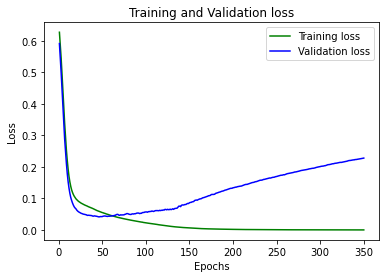

In [21]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,351)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

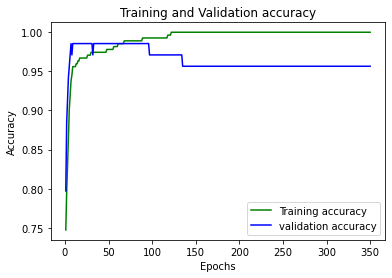

In [22]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,351)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

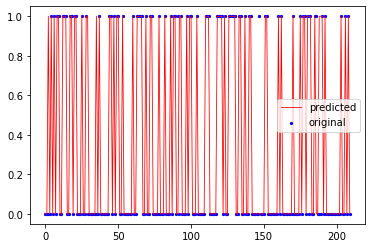

In [23]:
import matplotlib.pyplot as plt
x_ax = range(len(y_predict))
plt.scatter(x_ax, y_tester, s=5, color="blue", label="original")
plt.plot(x_ax, y_predict, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

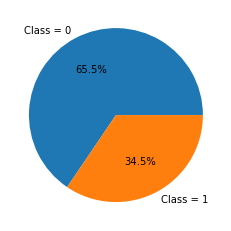

In [24]:
fig, ax = plt.subplots(1,1)
ax.pie(our_data['class'].value_counts(),autopct='%1.1f%%', labels=['Class = 0','Class = 1'])
plt.axis = 'equal'

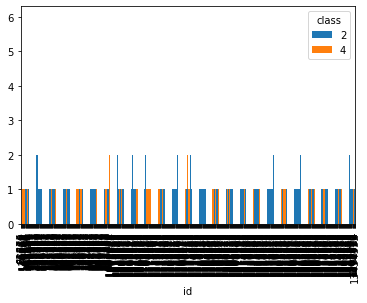

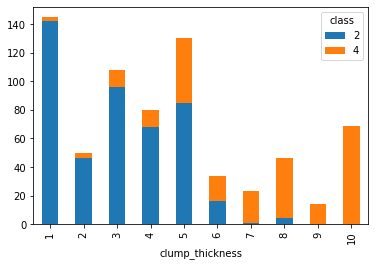

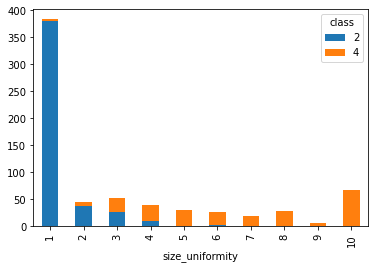

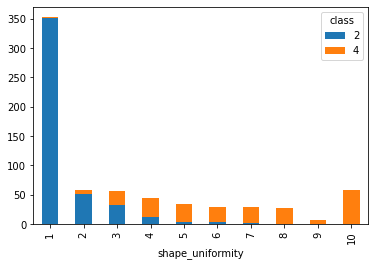

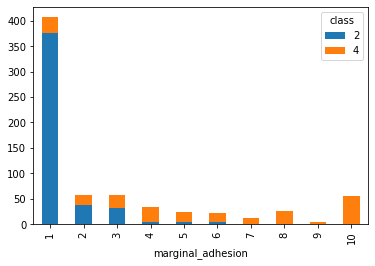

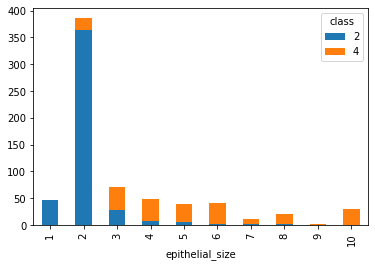

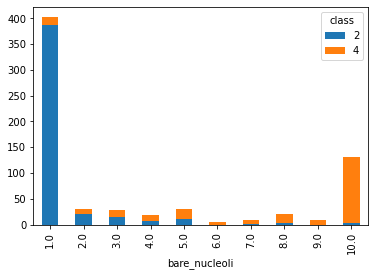

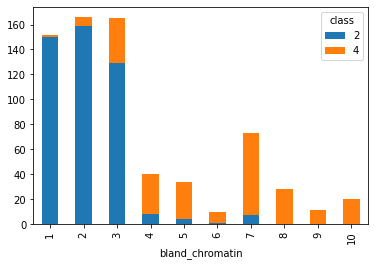

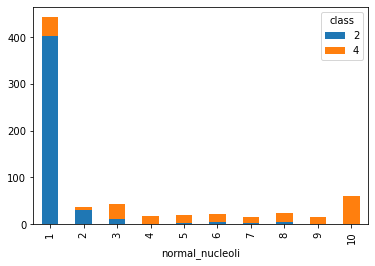

In [25]:
for i in range(9):
    column = our_data.iloc[:,i]
    graph = pd.crosstab(column,our_data['class'])
    graph.plot.bar(stacked=True)
    plt.show()

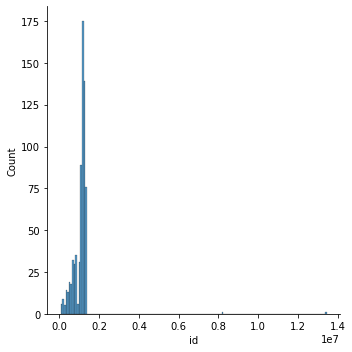

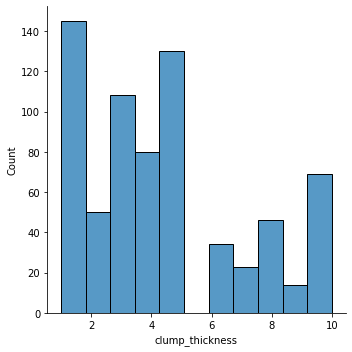

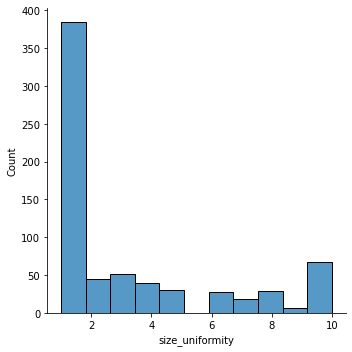

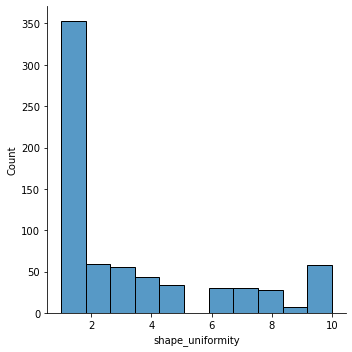

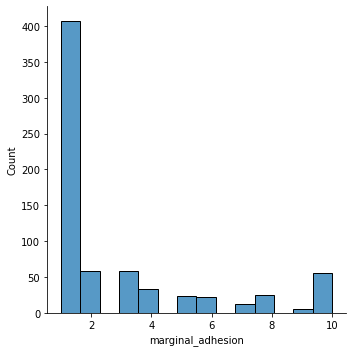

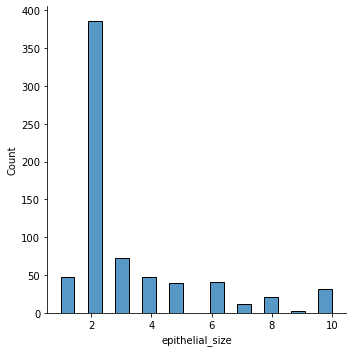

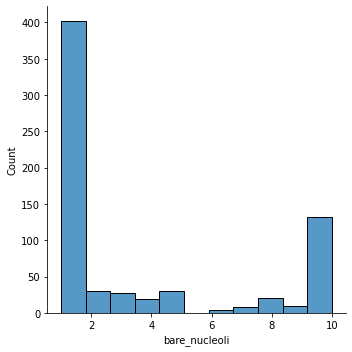

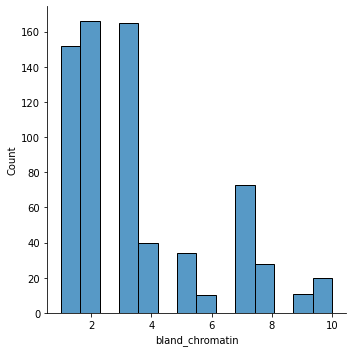

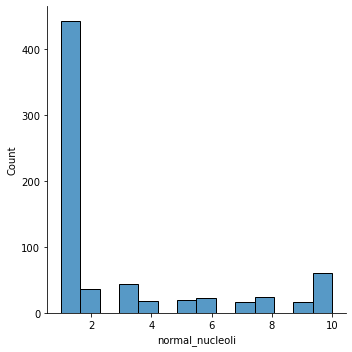

In [26]:
import seaborn as sb
for i in range(9):
    distribution = our_data.iloc[:,i]
    graph = sb.displot(distribution)
    plt.show()

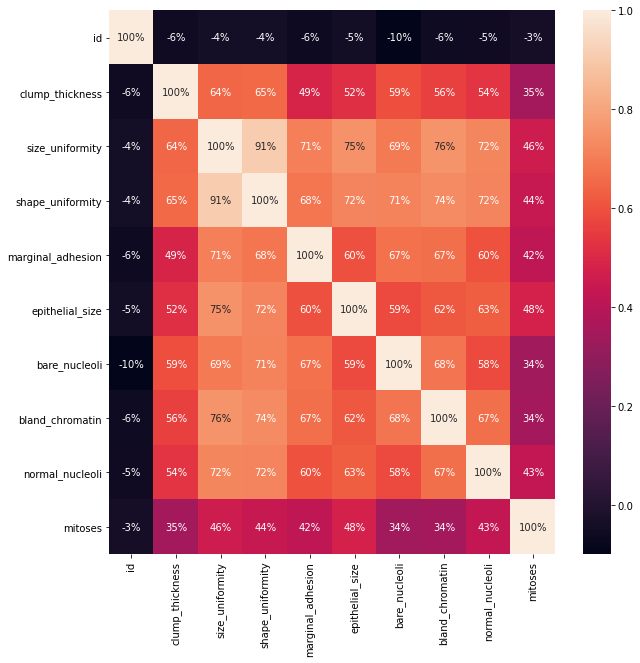

In [27]:
plt.figure(figsize = (10,10))
sb.heatmap(our_data.iloc[:,0:10].corr(), annot = True,fmt = '.0%')
plt.show()